In [18]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import make_circles,make_blobs
from sklearn.datasets import load_digits, load_breast_cancer
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

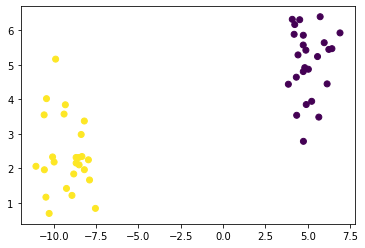

In [2]:
X,y = make_blobs(n_samples=50,n_features=2, centers=2)
plt.figure()
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [3]:
model = LogisticRegression()
model.fit(X,y)
print(model.coef_)
print(model.intercept_)

[[-0.84104993 -0.16527073]]
[-1.08341594]


Modelo

$ b_0 + b_1 x_1 + b_2 x_2 = 0$

$ b_2 x_2 = -b_0 - b_1 x_1 $

$ x_2 = -\frac{b_0}{b_2} - \frac{b_1}{b_2} x_1 $

Se parece a 

$ y = b + mx$

In [4]:
b0 = model.intercept_
b1 = model.coef_[0][0]
b2 = model.coef_[0][1]
m = -b1/b2
b = -b0/b2

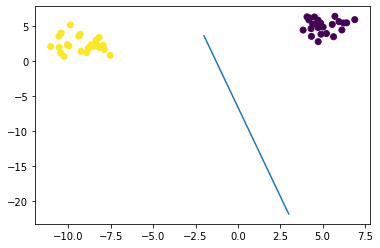

In [5]:
plt.figure()
plt.scatter(X[:,0],X[:,1],c=y)
plt.plot([-2,3],[-2*m+b,3*m+b])
plt.show()

## Nonlinear model

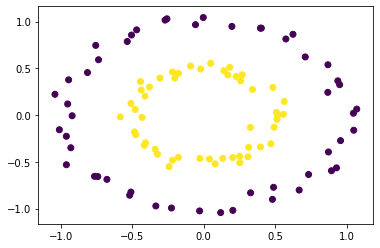

In [6]:
X,y = make_circles(n_samples=100, factor=.5,noise=.05)
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [7]:
XX = np.concatenate((X,X**2),axis=1)
model = LogisticRegression()
model.fit(XX,y)
print(model.coef_)
print(model.intercept_)

[[ 0.03011157 -0.0188053  -3.71230537 -3.63192505]]
[2.32198694]


Modelo

$ b_0 + b_1 x_1 + b_2 x_2 + b_3 x_1^2 + b_4 x_2^2  = 0$

Si quitamos los coeficientes que casi son 0:

$ b_4 x_2^2 = -b_0 - b_3 x_1^2$

$ x_2^2 = -\frac{b_0}{b_4} - \frac{b_3}{b_4} x_1^2 $

$ x_2 = \sqrt{-\frac{b_0}{b_4} - \frac{b_3}{b_4} x_1^2} $

Se parece a 

$ y = b + mx$

In [8]:
b0 = model.intercept_
b3 = model.coef_[0][2]
b4 = model.coef_[0][3]
px = np.arange(-1.0,1.0,0.1)
py = np.sqrt( -(b0/b4)-(b3/b4)*px**2 )
py2 = -np.sqrt( -(b0/b4)-(b3/b4)*px**2 )

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


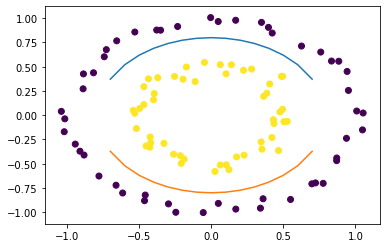

In [9]:
X,y = make_circles(n_samples=100, factor=.5,noise=.05)
plt.scatter(X[:,0],X[:,1],c=y)
plt.plot(px,py)
plt.plot(px,py2)
plt.show()

## Digits dataset

In [13]:
X,Y = load_digits(return_X_y = True)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.30, random_state=42)
print('X',X.shape)
print('Xtrain',Xtrain.shape)
print('Xtest',Xtest.shape)

X (1797, 64)
Xtrain (1257, 64)
Xtest (540, 64)


In [17]:
model = LogisticRegression()
model.fit(Xtrain,ytrain)
ypred = model.predict(Xtest)

print('Acc:',accuracy_score(ytest,ypred))
print('Macro F1:',f1_score(ytest,ypred,average='macro'))
print( confusion_matrix(ytest,ypred) )

Acc: 0.9648148148148148
Macro F1: 0.9648353319332248
[[53  0  0  0  0  0  0  0  0  0]
 [ 0 47  1  0  0  0  0  0  2  0]
 [ 0  1 46  0  0  0  0  0  0  0]
 [ 0  0  1 52  0  1  0  0  0  0]
 [ 0  1  0  0 58  0  1  0  0  0]
 [ 0  1  0  0  0 62  1  1  0  1]
 [ 0  0  0  0  0  1 52  0  0  0]
 [ 0  0  0  0  0  1  0 53  0  1]
 [ 0  0  0  0  0  1  0  0 42  0]
 [ 0  0  0  1  0  0  0  0  2 56]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Breast cancer

In [19]:
X,Y = load_breast_cancer(return_X_y = True)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.30, random_state=42)
print('X',X.shape)
print('Xtrain',Xtrain.shape)
print('Xtest',Xtest.shape)

X (569, 30)
Xtrain (398, 30)
Xtest (171, 30)


In [24]:
model = LogisticRegression()
model.fit(Xtrain,ytrain)
ypred = model.predict(Xtest)
yprob = np.exp(model.predict_log_proba(Xtest))
print('Acc:',accuracy_score(ytest,ypred))
print('Macro F1:',f1_score(ytest,ypred,average='macro'))
print( confusion_matrix(ytest,ypred) )

Acc: 0.9707602339181286
Macro F1: 0.9682592716338123
[[ 59   4]
 [  1 107]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [25]:
print( ypred[:10])
print( yprob[:10] )

[1 0 0 1 1 0 0 0 1 1]
[[1.25969954e-01 8.74030046e-01]
 [9.99999995e-01 4.70890642e-09]
 [9.93294027e-01 6.70597304e-03]
 [3.32551659e-03 9.96674483e-01]
 [1.28598618e-03 9.98714014e-01]
 [1.00000000e+00 4.98264222e-10]
 [1.00000000e+00 8.57997216e-13]
 [9.95594085e-01 4.40591464e-03]
 [3.84940570e-03 9.96150594e-01]
 [1.90255442e-02 9.80974456e-01]]
